In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('penguins.csv')
df.head()

,speciesName,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650


In [2]:
# Standard Scaling of data

scaled_df = df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]

for i in scaled_df.columns:
    scaled_df[i] = (scaled_df[i] - scaled_df[i].mean())/scaled_df[i].std()


c:\users\ayray\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Factor Analysis

In [3]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis().fit(scaled_df)

factors_df = pd.DataFrame(fa.components_,columns=scaled_df.columns)

In [4]:
print(factors_df)

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        0.669078      -0.564385           0.873709     0.838500
1        0.175562       0.233976          -0.010952     0.012441
2        0.000000      -0.000000          -0.000000    -0.000000
3        0.000000      -0.000000          -0.000000     0.000000


In [8]:
fa = FactorAnalysis(n_components=2).fit(scaled_df)

FA_fit= fa.fit_transform(scaled_df)
FA_fit[0:5,:]

array([[-1.31801089,  0.0606314 ],
       [-0.97288664, -0.40950738],
       [-0.52957234, -0.06888013],
       [-0.68368734,  0.38981206],
       [-0.8570299 ,  1.06343239]])

In [9]:
FAs_df = pd.DataFrame(data = FA_fit , 
        columns = ['FA1', 'FA2'])
FAs_df['Species'] = df.speciesName.values
FAs_df.head()

,FA1,FA2,Species
0,-1.318011,0.060631,Adelie
1,-0.972887,-0.409507,Adelie
2,-0.529572,-0.068880,Adelie
3,-0.683687,0.389812,Adelie
4,-0.857030,1.063432,Adelie


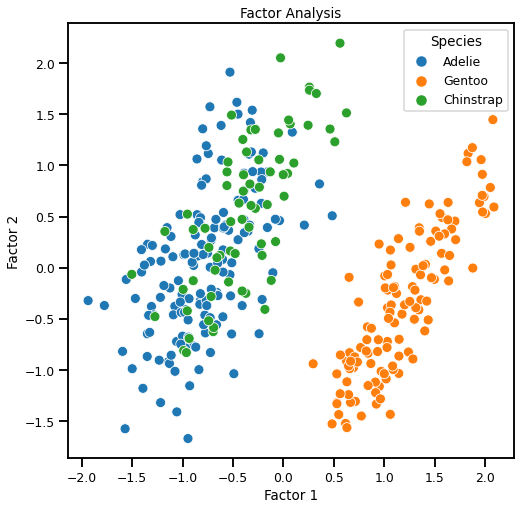

In [10]:
plt.figure(figsize=(8,8))
with sns.plotting_context("talk",font_scale=0.75):
    sns.scatterplot(x="FA1", y="FA2",
                    data=FAs_df, 
                    hue="Species",
                    s=100)
    plt.xlabel("Factor 1")
    plt.ylabel("Factor 2")
    plt.title("Factor Analysis")

# Principal Component Analysis

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca = pca.fit(scaled_df)

display(pca.explained_variance_ratio_) 
# this shows the amount of variance explained by each principal component, First being PC1

array([0.68843878, 0.19312919, 0.09130898, 0.02712305])

The first two principal components are summing up to more than 80% of the variance in the data.

Thus taking 2 components as hyperparameters and getting the principal components should suffice

In [12]:
pca_fit = PCA(n_components=2).fit_transform(scaled_df)

PCs_df = pd.DataFrame(data = pca_fit , 
        columns = ['PC1', 'PC2'])
PCs_df['Species'] = df.speciesName.values
PCs_df.head()

,PC1,PC2,Species
0,-1.840748,0.047632,Adelie
1,-1.304850,-0.427722,Adelie
2,-1.367178,-0.154250,Adelie
3,-1.876078,-0.002045,Adelie
4,-1.908951,0.827996,Adelie


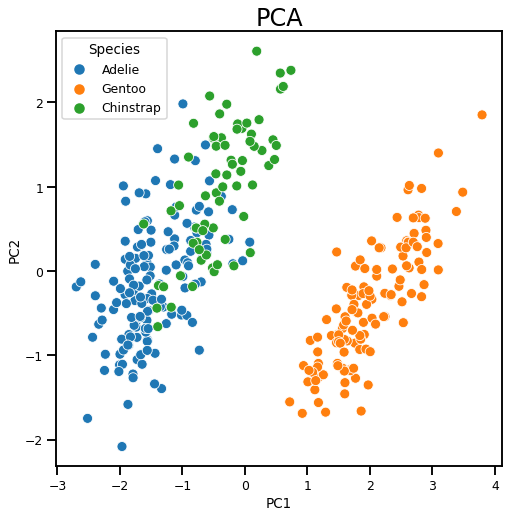

In [13]:
plt.figure(figsize=(8,8))
with sns.plotting_context("talk",font_scale=0.75):
    sns.scatterplot(x="PC1", y="PC2",
                    data=PCs_df, 
                    hue="Species",
                    s=100)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA", size=24)

# Independent Component Analysis

In [15]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2) # take n_components as same as PCA
ica_fit = ica.fit_transform(scaled_df)

ICs_df = pd.DataFrame(data = ica_fit , 
        columns = ['IC1', 'IC2'])
ICs_df['Species'] = df.speciesName.values
ICs_df.head()


,IC1,IC2,Species
0,-0.022539,0.055758,Adelie
1,-0.041787,0.027595,Adelie
2,-0.027346,0.036511,Adelie
3,-0.025801,0.055520,Adelie
4,0.020171,0.077951,Adelie


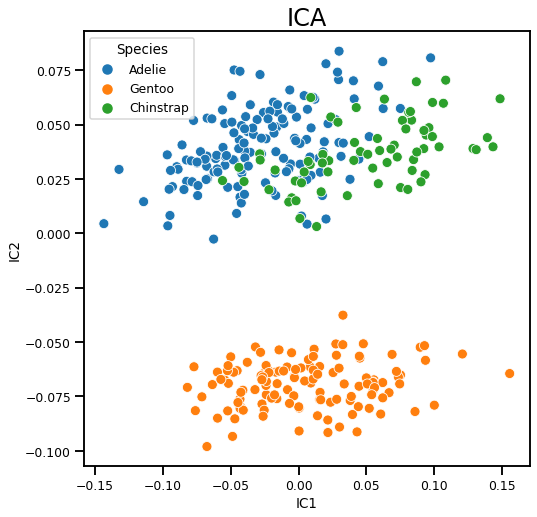

In [16]:
plt.figure(figsize=(8,8))
with sns.plotting_context("talk",font_scale=0.75):
    sns.scatterplot(x="IC1", y="IC2",
                    data=ICs_df, 
                    hue="Species",
                    s=100)
    plt.xlabel("IC1")
    plt.ylabel("IC2")
    plt.title("ICA", size=24)

# UMAP

In [17]:
import umap

umap = umap.UMAP()
umap_fit = umap.fit_transform(scaled_df)

UMAP_df = pd.DataFrame(data = umap_fit , 
        columns = ['U1', 'U2'])
UMAP_df['Species'] = df.speciesName.values
UMAP_df.head()

,U1,U2,Species
0,10.332614,3.359152,Adelie
1,9.335350,3.053762,Adelie
2,8.583857,3.207677,Adelie
3,10.913280,4.250587,Adelie
4,11.994424,4.045072,Adelie


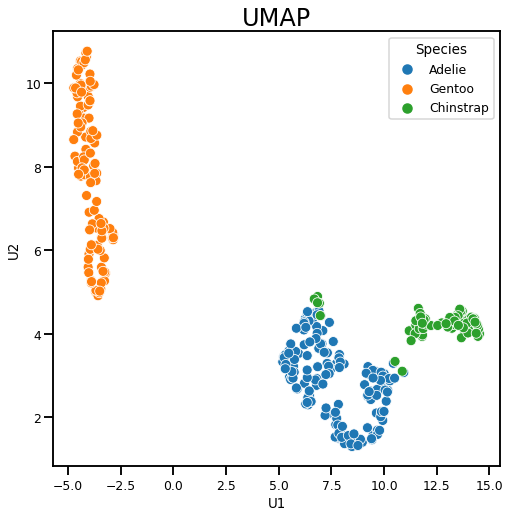

In [50]:
plt.figure(figsize=(8,8))
with sns.plotting_context("talk",font_scale=0.75):
    sns.scatterplot(x="U1", y="U2",
                    data=UMAP_df, 
                    hue="Species",
                    s=100)
    plt.xlabel("U1")
    plt.ylabel("U2")
    plt.title("UMAP", size=24)